In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scIB

In [2]:
import rpy2.rinterface_lib.callbacks
import logging

from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri
import anndata2ri

# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

## Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()

In [3]:
data_dir = 'notebooks/data/'
adata = sc.read(data_dir+'processed/00ReadData_droplet.h5ad', cache=True)

In [5]:
scIB.preprocessing.normalize(adata)

/home/m/muellermi/Dokumente/Master2/Masterpraktikum/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/m/muellermi/bin/miniconda3/envs/sc_tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/m/muellermi/Dokumente/Master2/Masterpraktikum/scanpy/scanpy/plotting/_anndata.py:320: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/m/muellermi/bin/miniconda3/envs/sc_tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. I

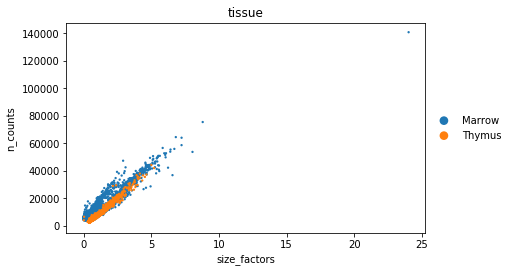

/home/m/muellermi/Dokumente/Master2/Masterpraktikum/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/m/muellermi/bin/miniconda3/envs/sc_tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/m/muellermi/Dokumente/Master2/Masterpraktikum/scanpy/scanpy/plotting/_anndata.py:320: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/m/muellermi/bin/miniconda3/envs/sc_tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. I

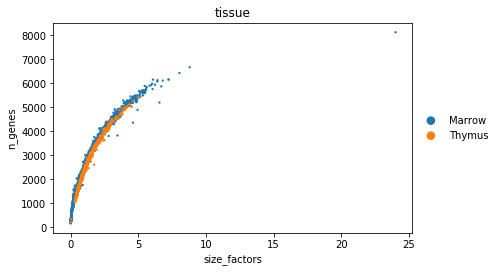

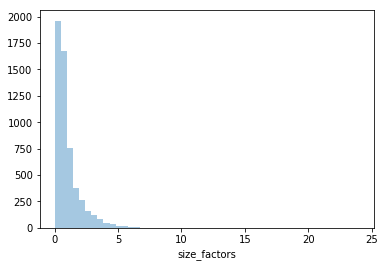

In [8]:
# visualize
sc.pl.scatter(adata, 'size_factors', 'n_counts', color='tissue')
sc.pl.scatter(adata, 'size_factors', 'n_genes', color='tissue')

sns.distplot(adata.obs['size_factors'], bins=50, kde=False)
plt.show()

Function code

In [ ]:
adata_pp = adata.copy()
sc.pp.normalize_per_cell(adata_pp, counts_per_cell_after=1e6)
sc.pp.log1p(adata_pp)
sc.pp.pca(adata_pp, n_comps=15, svd_solver='arpack')
sc.pp.neighbors(adata_pp)
sc.tl.louvain(adata_pp, key_added='groups', resolution=0.5)

In [ ]:
#Preprocess variables for scran normalization
ro.globalenv['data_mat'] = adata.X.T
ro.globalenv['input_groups'] = adata_pp.obs['groups']

In [ ]:
ro.r('library("scran")')

In [ ]:
size_factors = ro.r('computeSumFactors(data_mat, clusters = input_groups, min.mean = 0.1)')

In [ ]:
adata.obs['size_factors'] = size_factors